In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import h5py
import pandas, numpy, random
import matplotlib.pyplot as plt

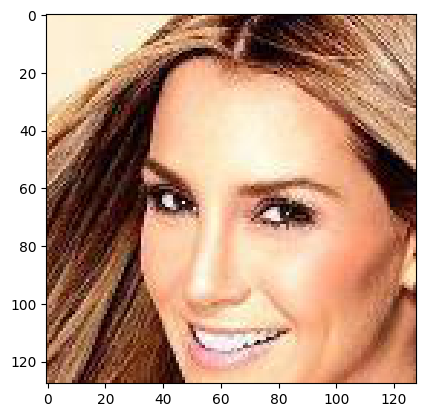

In [3]:
def crop_centre(img, new_width, new_height):
    height, width, _ = img.shape
    startx = width//2 - new_width//2
    starty = height//2 - new_height//2    
    return img[  starty:starty + new_height, startx:startx + new_width, :]
    # return img[:250,:30]

class CelebADataset(Dataset):
    
    def __init__(self, file):
        self.file_object = h5py.File(file, 'r')
        self.dataset = self.file_object['img_align_celeba']
        pass
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        if (index >= len(self.dataset)):
          raise IndexError()
        img = numpy.array(self.dataset[str(index)+'.jpg'])
        # crop to 128x128 square
        img = crop_centre(img, 128, 128)
        return torch.cuda.FloatTensor(img).permute(2,0,1).view(1,3,128,128) / 255.0
    
    def plot_image(self, index):
        img = numpy.array(self.dataset[str(index)+'.jpg'])
        # crop to 128x128 square
        img = crop_centre(img, 128, 128)
        plt.imshow(img, interpolation='nearest')
        pass
    
    pass

celeba_dataset = CelebADataset('../celeba_dataset/celeba_aligned_small.h5py')
celeba_dataset.plot_image(0)

In [4]:
class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            # 预期输入形状 (1,3,128,128)
            nn.Conv2d(3, 256, kernel_size=8, stride=2),
            # nn.BatchNorm2d(256),
            # nn.LeakyReLU(0.2),
            
            # nn.Conv2d(256, 256, kernel_size=8, stride=2),
            # nn.BatchNorm2d(256),
            # nn.LeakyReLU(0.2),
            
            # nn.Conv2d(256, 3, kernel_size=8, stride=2),
            # nn.LeakyReLU(0.2),
            
            # # View(3*10*10),
            # nn.Linear(3*10*10, 1),
            # nn.Sigmoid()
        )
        
        # create loss function
        # self.loss_function = nn.BCELoss()

        # # create optimiser, simple stochastic gradient descent
        # self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

        # # counter and accumulator for progress
        # self.counter = 0;
        # self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        print(outputs)
        
        # # calculate loss
        # loss = self.loss_function(outputs, targets)

        # # increase counter and accumulate error every 10
        # self.counter += 1;
        # if (self.counter % 10 == 0):
        #     self.progress.append(loss.item())
        #     pass
        # if (self.counter % 1000 == 0):
        #     print("counter = ", self.counter)
        #     pass

        # # zero gradients, perform a backward pass, update weights
        # self.optimiser.zero_grad()
        # loss.backward()
        # self.optimiser.step()

        # pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    
    pass

In [ ]:
# D = Discriminator()
# D.cuda()
# for image_data_tensor in celeba_dataset[0]:
#     image_data_tensor = image_data_tensor.view(1,3,128,128)
#     D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))

In [11]:
l1 = nn.Conv2d(3, 256, kernel_size=8, stride=2,device='cuda')
print(l1.weight.shape)
l2 = nn.Conv2d(256, 256, kernel_size=8, stride=2,device='cuda')
print(l2.weight.shape)
l3 = nn.Conv2d(256, 3, kernel_size=8, stride=2,device='cuda')
print(l3.weight.shape)
for image_data_tensor in celeba_dataset[0]:
    image_data_tensor = image_data_tensor.view(1,3,128,128)
    res = l1(image_data_tensor)
print(res.shape)

torch.Size([256, 3, 8, 8])
torch.Size([256, 256, 8, 8])
torch.Size([3, 256, 8, 8])
torch.Size([1, 256, 61, 61])
